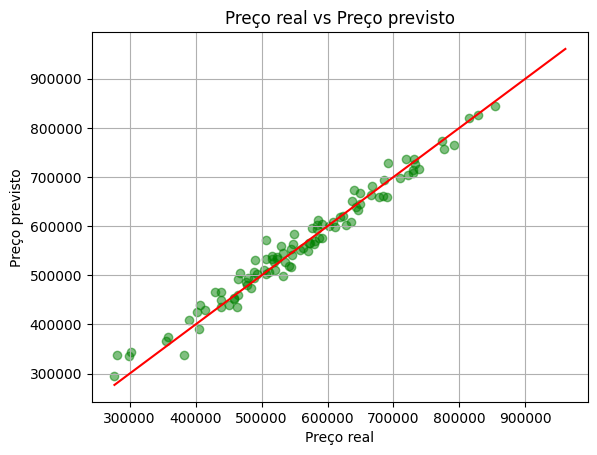

Preço previsto: R$ 582,925.27


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# importando os dados
df = pd.read_csv('data/dataset.csv')

# correcao positiva = ambos valores aumentam | correcao negativa = uma gangorra, se um aumenta o outro diminui
correlation = df.corr(numeric_only=True)

# tira a coluna id, n é util neste caso
df = df.drop(columns=['ID'])

# isso faz com q os valores NaN se tornem 0
df.fillna(0, inplace=True)

# tira a coluna price, pois ela vai ser a variavel dependente
X = df.drop(columns=['Price'])

# separa a variavel dependente aqui, para o calculo final
y = df['Price']

# aqui separo as variaveis do teste e do treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# aqui eu treino primeiro o modelo, para prever o preco
model = LinearRegression()
model.fit(X_train, y_train)

# aqui o resultado do treinamento
y_pred = model.predict(X_test)

# desenhando os dados
plt.scatter(y_test, y_pred, color="green", alpha=0.5)

# beleza do grafico
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Preço real vs Preço previsto")
plt.grid(True)

# desenhando o linear regression
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')

# desenhando o grafico
plt.show()

# com esse metodo consigo prever o valor medio do imovel em base aos dados de entrada
imovel = pd.DataFrame([X.mean()])

# e aqui eu finalmente tenho o preco previsto
preco_previsto = model.predict(imovel)

# resultado final
print(f"Preço previsto: R$ {preco_previsto[0]:,.2f}")
